In [81]:
from wishpy.dataworker import DataWorker
dw = DataWorker(google_secret='../wishpy/client_secret.json')

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import pdb
import datetime
from scipy import stats

%matplotlib inline

In [13]:
df_raw = dw.td_query(engine='hive' , job_id=614295311)
df_raw.head(10)

You can look at job id 614295311


,country,state,city,product_id,variation_id,fbs_inv,blue_inv,blue_sales,fbs_sales,is_blue_sales,is_fbs_sales,merch_sales,store_count,region_rank
0,US,Texas,77009,5c09f46024d662465f5d25fb,5c09f46024d662465f5d25fc,0,5,0,0,0,0,NaN,NaN,NaN
1,US,Texas,77009,5c359f1eb8115c26bd1b936b,5c359f1eb8115c26bd1b936c,0,3,0,0,0,0,NaN,NaN,NaN
2,US,Texas,77009,5c359f1eb8115c26bd1b936b,5c359f2fcdbd063c16534229,0,3,0,0,0,0,NaN,NaN,NaN
3,US,Texas,77009,5c4a02d05ac58a26b94baa4b,5c4a03178b26e56dcf17a534,0,3,0,0,0,0,NaN,NaN,NaN
4,US,Texas,77009,5c4a02d05ac58a26b94baa4b,5c4a032552631e2672b8eff4,0,3,0,0,0,0,NaN,NaN,NaN
5,US,Texas,77009,5c4a0323057b9326e1949c97,5c4a033ee83328346494d4ea,0,2,0,0,0,0,NaN,NaN,NaN
6,US,Texas,77009,5c4a0323057b9326e1949c97,5c4a0366cf1bc6270d76b5d8,0,4,1,0,1,0,NaN,NaN,NaN
7,US,Texas,77009,5c4a0340cfd83a4d35d976ea,5c4a034802842641e3cd4e87,0,2,0,0,0,0,NaN,NaN,NaN
8,US,Texas,77009,5c4a0341e1fb9026a136cac7,5c4a04878084cd269d4ff3f5,0,3,0,0,0,0,NaN,NaN,NaN
9,US,Texas,77009,5c4a0341e1fb9026a136cac7,5c4a056e577c0c26b08675d2,0,3,0,0,0,0,NaN,NaN,NaN


# FBS data

In [62]:
df_fbs = df_raw.loc[(df_raw.fbs_inv>0) & (df_raw.blue_inv==0),:]
#df_fbs[['merch_sales','store_count','region_rank']] = df_fbs[['merch_sales','store_count','region_rank']].fillna(0)
df_fbs = df_raw.loc[df_raw.region_rank.notnull(),:]
df_fbs.head()

,country,state,city,product_id,variation_id,fbs_inv,blue_inv,blue_sales,fbs_sales,is_blue_sales,is_fbs_sales,merch_sales,store_count,region_rank
361,US,SC,Aiken,5c4a0322772235268e395f24,5c4a0342f7fd2c269d84f58e,0,2,0,0,0,0,1.0,1.0,62.0
362,US,SC,Aiken,5c4a0322772235268e395f24,5c4a0342f7fd2c269d84f58e,0,2,0,0,0,0,1.0,1.0,240.0
576,US,Ohio,Akron,5d1573076ee9c268adf3bf85,5d1573366ee9c268adf3c168,0,3,0,0,0,0,1.0,3.0,303.0
577,US,Ohio,Akron,5d1573076ee9c268adf3bf85,5d1573366ee9c268adf3c168,0,3,0,0,0,0,1.0,2.0,307.0
578,US,OH,Akron,5d1573076ee9c268adf3bf85,5d1573366ee9c268adf3c168,0,1,0,0,0,0,1.0,3.0,303.0


In [63]:
df_fbs.shape[0], df_raw.shape[0], str(round(100*df_fbs.shape[0]/df_raw.shape[0],1))+'%'

(11405, 136489, '8.4%')

## Correlation between whether there is sale and prod region sales ranking

<Figure size 432x288 with 0 Axes>

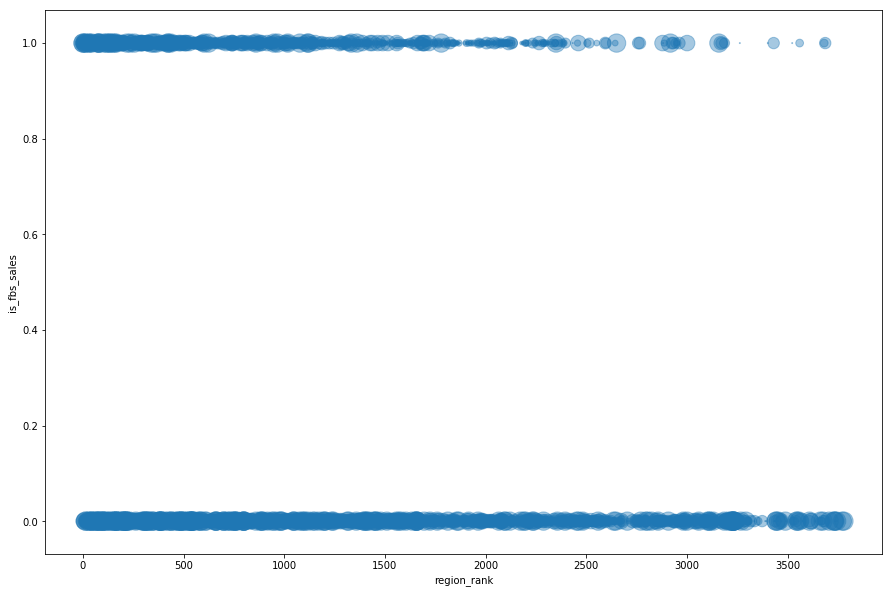

In [93]:
plt.figure()
plt.figure(figsize=(15,10))
plt.xlabel("region_rank")
plt.ylabel("is_fbs_sales")
plt.scatter(y=df_fbs.is_fbs_sales, x=df_fbs.region_rank, alpha=0.4, s=df_fbs.store_count**1.6)
plt.show()

In [65]:
np.corrcoef(x=df_fbs.is_fbs_sales, y=df_fbs.region_rank)

array([[ 1.        , -0.12966321],
       [-0.12966321,  1.        ]])

### H0:There is no statistically significant relationship between region_rank and whether this is a fbs store sales

In [85]:
chi2, p, dof, ex = stats.chi2_contingency([df_fbs.region_rank,df_fbs.is_fbs_sales], correction=False)
chi2, p, dof

(80690.26461975742, 0.0, 11404)

## correlation between store sales sum and prod region sales rank

<Figure size 432x288 with 0 Axes>

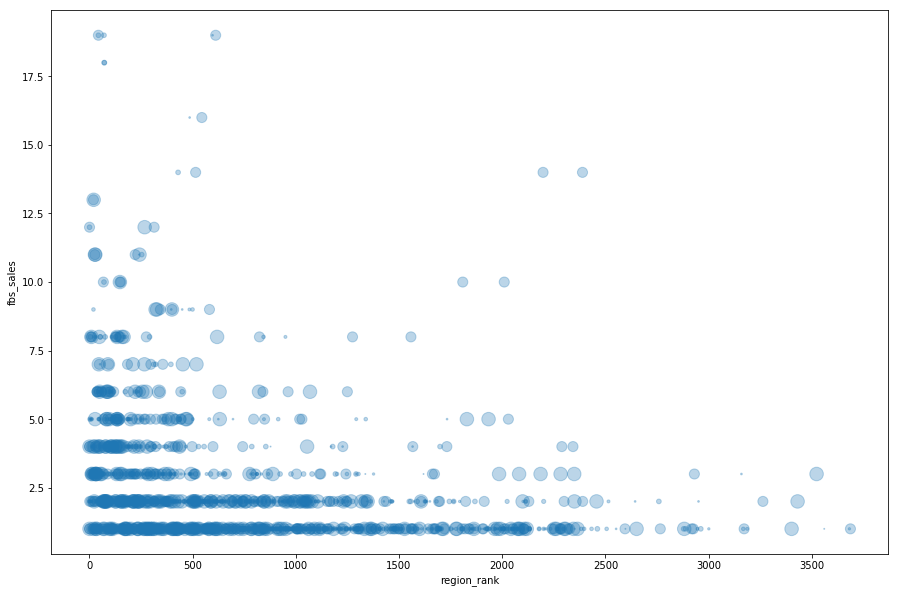

In [90]:
plt.figure()
plt.figure(figsize=(15,10))
plt.xlabel("region_rank")
plt.ylabel("fbs_sales")
plt.scatter(y=df_fbs[df_fbs.fbs_sales>0].fbs_sales, x=df_fbs[df_fbs.fbs_sales>0].region_rank, alpha=0.3, s=df_fbs.store_count**1.6)
plt.show()

In [92]:
np.corrcoef(y=df_fbs[df_fbs.fbs_sales>0].fbs_sales, x=df_fbs[df_fbs.fbs_sales>0].region_rank)

array([[ 1.        , -0.23077787],
       [-0.23077787,  1.        ]])

### H0:There is no statistically significant relationship between region_rank and whether this is a fbs store sales

In [89]:
chi2, p, dof, ex = stats.chi2_contingency([df_fbs[df_fbs.fbs_sales>0].fbs_sales,df_fbs[df_fbs.fbs_sales>0].region_rank], correction=False)
chi2, p, dof

(60906.12719488704, 0.0, 2090)